## Observations and Insights 

<h3>Observation 1</h3>
<p>For the pie chart, it can be observed that for the mice distribution more males were used in the study compared to females. This brings into question if there should have been an equal distribution of mice and if it would have played a role in the study as another factor to tumor sizes.</p> 

<h3>Observation 2</h3>
<p>The bar chart presents us with the total timepoints for all mice that were tested for each drug regimen. Both Capomulin and Ramicane had the most time points when compared to the rest of the regimens. Regimens Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Stelasyn, and Zoniferol remained with similar timepoint totals with slight differences while Propriva remained as the regimen with the least amount of timepoints.</p>

<h3>Observation 3</h3>
<p>In the volume vs. time point line plot, mouse m601 was selected to analyze Capomulin. The line plot presents the tumIn the volume vs. time point line plot, mouse m601 was selected to analyze Capomulin. The line plot presents the tumor volume size change throughout the different time points. As the mouse was measured, the tumor size decreased. It can be inferred that Capomulin helped mouse m601 by decreasing its tumor size but more information would be needed before making that determination as other factors could have also played a role in the tumor reduction.</p>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_mouse_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#checking_mice = combined_mouse_df.duplicated(subset=['Timepoint','Mouse ID'])
#checking_mice

combined_mouse_df.loc[combined_mouse_df.duplicated(subset=['Timepoint','Mouse ID'])]['Mouse ID']

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

#clean_mouse = 

checking_mouse = combined_mouse_df[(combined_mouse_df["Mouse ID"] == "g989")]
checking_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = combined_mouse_df[(combined_mouse_df["Mouse ID"] != "g989")]
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
#clean_mouse['Mouse ID'].unique()
clean_mouse['Mouse ID'].nunique()
#len(clean_mouse['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_mean = clean_mouse.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_median = clean_mouse.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_variance = clean_mouse.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_sd = clean_mouse.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_sem = clean_mouse.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_summary = pd.DataFrame({'Mean': drug_mean,
                                    'Median': drug_median,
                                    '% Variance': drug_variance,
                                    '% Standard Deviation': drug_sd,
                                    '% SEM': drug_sem,
                                })
drug_summary




,Mean,Median,% Variance,% Standard Deviation,% SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})
summary_table = clean_mouse.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std','sem']})
summary_table

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Total # of Time Points')

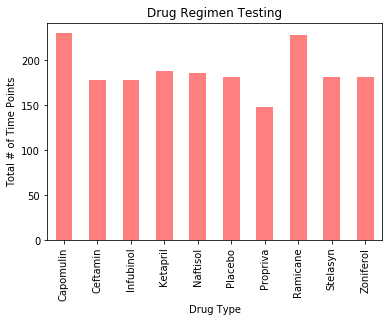

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints_totals = clean_mouse.groupby(["Drug Regimen"]).count()["Timepoint"]
timepoints_totals.plot(kind="bar", facecolor="red", alpha=0.5)

plt.title("Drug Regimen Testing")
plt.xlabel("Drug Type")
plt.ylabel("Total # of Time Points")

#timepoints_totals


Text(0, 0.5, 'Total # of Time Points')

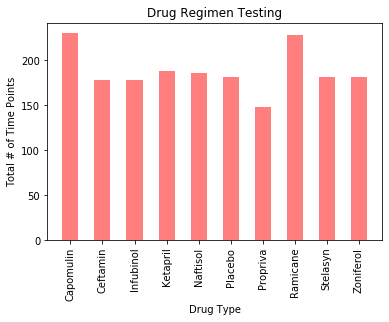

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints = clean_mouse.groupby(["Drug Regimen"]).count()["Timepoint"]
timepoints_sum = timepoints_totals.to_frame()
drug = timepoints_sum.index
#use this to reset the index df.reset_index()

plt.bar(drug, timepoints, color='r', alpha=0.5, width=0.5, align="center")
plt.xticks(rotation=90)
#timepoints_sum.plot(kind="bar", figsize=(10,4))

plt.title("Drug Regimen Testing")
plt.xlabel("Drug Type")
plt.ylabel("Total # of Time Points")

#plt.tight_layout()




Male      125
Female    123
Name: Sex, dtype: int64

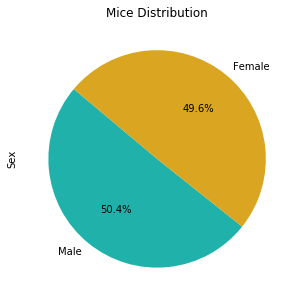

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#drop the duplicate sexes to get an accurate number
duplicate_drop = clean_mouse.drop_duplicates(subset=['Mouse ID'])
final_counts = duplicate_drop["Sex"].value_counts()


final_counts.plot(kind="pie", autopct="%1.1f%%", figsize=(5,5), title="Mice Distribution", 
                  colors=["lightseagreen","goldenrod"], startangle=140)

final_counts.colors = ["lightseagreen", "goldenrod"]




final_counts

([<matplotlib.patches.Wedge at 0x7fda18c82cc0>,
 [Text(-0.6963355017006471, -0.8515379434125696, 'Male'),
  Text(0.6963355017006471, 0.8515379434125695, 'Female')],
 [Text(-0.37981936456398924, -0.46447524186140154, '50.4%'),
  Text(0.37981936456398924, 0.46447524186140143, '49.6%')])

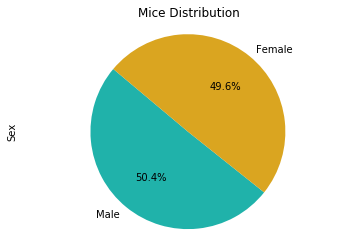

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#male_dupdrop = duplicate_drop[(duplicate_drop["Sex"] == "Male")]
#male_count = male_dupdrop.groupby(["Mouse ID"]).count()["Sex"]
#males = male_count.sum()

#female_dupdrop = duplicate_drop[(duplicate_drop["Sex"] == "Female")]
#female_count = female_dupdrop.groupby(["Mouse ID"]).count()["Sex"]
#females = female_count.sum()

#mf_summary = pd.DataFrame({"Male": [male_totals], "Female": [female_totals]})

colors = ["lightseagreen", "goldenrod"]
mf_py = plt.pie(final_counts, labels=["Male", "Female"], colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Mice Distribution")
plt.axis("equal")
plt.ylabel("Sex")
mf_py


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#store by regimens to group them
capomulin_set = clean_mouse[(clean_mouse["Drug Regimen"] == "Capomulin")]
ramicane_set = clean_mouse[(clean_mouse["Drug Regimen"] == "Ramicane")]
infubinol_set = clean_mouse[(clean_mouse["Drug Regimen"] == "Infubinol")]
ceftamin_set = clean_mouse[(clean_mouse["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
#use groupby to get the max timepoint for each based off of the treatment sets above
capomulin_time = capomulin_set.groupby(["Mouse ID"]).max()["Timepoint"]
ramicane_time = ramicane_set.groupby(["Mouse ID"]).max()["Timepoint"]
infubinol_time = infubinol_set.groupby(["Mouse ID"]).max()["Timepoint"]
ceftamin_time = ceftamin_set.groupby(["Mouse ID"]).max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_set = pd.merge(capomulin_time, clean_mouse, how='left', on=['Mouse ID', 'Timepoint'])
ramicane_set = pd.merge(ramicane_time, clean_mouse, how='left', on=['Mouse ID', 'Timepoint'])
infubinol_set = pd.merge(infubinol_time, clean_mouse, how='left', on=['Mouse ID', 'Timepoint'])
ceftamin_set = pd.merge(ceftamin_time, clean_mouse, how='left', on=['Mouse ID', 'Timepoint'])


capomulin_set

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
#use merged sets above to fill this list
drug_sets = [capomulin_set, ramicane_set, infubinol_set, ceftamin_set]
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
r = 0

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for mice in drug_sets:
    regimen = mice.loc[:, "Tumor Volume (mm3)"]
    tumor_vol.append(regimen)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    #grabbing the quartiles variables from activity
    quartiles = regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    analysis = (
      f"Drug: {drug_regimens[r]} \n"
      f"Values below {lower_bound} could be outliers.\n"
      f"Values above {upper_bound} could be outliers.\n"
      )
    
    r+=1
    print(analysis)
    
    

Drug: Capomulin 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Drug: Ramicane 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Drug: Infubinol 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Drug: Ceftamin 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.



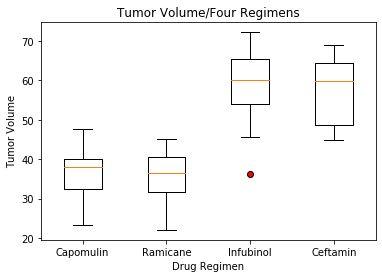

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_circle = dict(markerfacecolor='r', marker='o')

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume/Four Regimens')
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_vol, labels=drug_regimens, flierprops=red_circle)
plt.show()


## Line and Scatter Plots

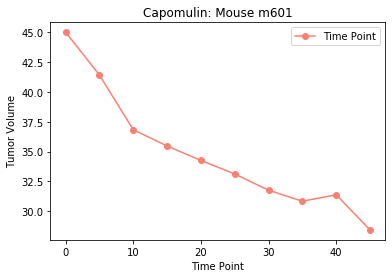

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#assuming I can choose any mouse, picking m601

m601 = clean_mouse[(clean_mouse["Mouse ID"] == "m601")]
#m601
mouse_m601 = plt.plot(m601["Timepoint"], m601["Tumor Volume (mm3)"], marker ='o', color='salmon', label="Time Point")
time_axis = (m601["Mouse ID"])
plt.title("Capomulin: Mouse m601")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.legend(loc="upper right")






Text(0, 0.5, 'Average Tumor Volume')

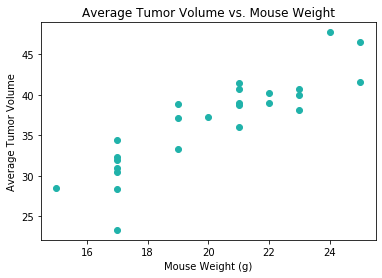

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = capomulin_set["Weight (g)"]
tum_vol = capomulin_set.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

average_set = plt.scatter(mouse_weight, tum_vol, marker ='o', facecolors='lightseagreen')
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume")

#mouse_weight

## Correlation and Regression

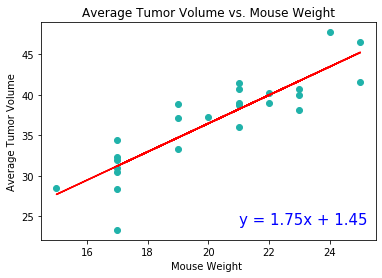

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_set["Weight (g)"]
y_values = capomulin_set.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker ='o', facecolors='lightseagreen')
plt.plot(x_values,regress_values,"r-")

#the numbers in the plt.annotate line (21,24) are to adjust the equation position
plt.annotate(line_eq,(21,24),fontsize=15,color="blue")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight ")
plt.ylabel("Average Tumor Volume")
plt.show()